In [3]:
!pip install matplotlib
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('/content/hotel_guests_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,23 Apr 2020,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,1,steven59@example.org,False,BASIC,NaN,27 Jun 2020,16 Aug 2020,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,07 Apr 2020,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,08 Jun 2020,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,27 Oct 2019,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978


In [ ]:
df.shape

(2000, 10)

In [ ]:
df.describe()

,Unnamed: 0,amenities_fee,room_rate,credit_card_number
count,2000.000000,1816.000000,2000.000000,2.000000e+03
mean,999.500000,18.625723,156.397620,3.529920e+17
std,577.494589,9.900830,50.793336,1.212466e+18
min,0.000000,0.000000,83.800000,6.040371e+10
25%,499.750000,11.897006,115.704236,3.674461e+13
50%,999.500000,18.334560,153.181718,3.514294e+15
75%,1499.250000,25.566208,192.001124,4.583879e+15
max,1999.000000,47.478848,345.459749,4.984532e+18


In [ ]:
df.tail()

,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
1995,1995,valerie83@example.org,False,BASIC,9.377198,22 Sep 2020,24 Sep 2020,110.402139,"377 Thomas Forks Apt. 288\nNorth Sean, ME 41583",2551419503001787
1996,1996,hartdaniel@example.org,False,BASIC,18.580052,03 Sep 2020,23 Sep 2020,132.147103,USNV Thompson\nFPO AE 99295,30545507259735
1997,1997,fbaker@example.org,False,BASIC,20.228473,26 Jan 2021,28 Feb 2021,203.245188,"16836 Gonzalez Plain\nLake Hollyberg, AZ 47272",2258564950501684
1998,1998,jenniferbradley@example.org,False,BASIC,8.730536,27 Jul 2020,31 Jul 2020,103.702257,"9937 Katie Drives Suite 319\nAndrademouth, VT ...",4626487361085121933
1999,1999,travis58@example.net,False,BASIC,19.454490,09 May 2020,24 Jun 2020,83.800000,"5003 Ryan Keys\nRodriguezview, NH 22259",374431689949001


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2000 non-null   int64  
 1   guest_email         2000 non-null   object 
 2   has_rewards         2000 non-null   bool   
 3   room_type           2000 non-null   object 
 4   amenities_fee       1816 non-null   float64
 5   checkin_date        2000 non-null   object 
 6   checkout_date       1931 non-null   object 
 7   room_rate           2000 non-null   float64
 8   billing_address     2000 non-null   object 
 9   credit_card_number  2000 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 142.7+ KB


`df['room_rate'].mean()`Digunakan untuk mengetahui rata-rata dari suatu kolom data

In [ ]:
df['room_rate'].mean()

156.39762038904732

`df['amenities_fee'].min(), df['amenities_fee'].max()`Digunakan untuk  mengetahui nilai maximum dan minimum pada suatu kolom data



In [ ]:
df['amenities_fee'].min(), df['amenities_fee'].max()

(0.0, 47.47884793240972)

`df = df.rename(columns={'room_rate':'XOXO'})`Digunakan untuk mengubah nama kolom data sesuai yang kita mau

In [ ]:
df = df.rename(columns={'room_rate':'XOXO'})

In [ ]:
df.head()

,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,xoxo,billing_address,credit_card_number
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,23 Apr 2020,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,1,steven59@example.org,False,BASIC,NaN,27 Jun 2020,16 Aug 2020,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,07 Apr 2020,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,08 Jun 2020,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,27 Oct 2019,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['room_rate_minmax'] = MinMaxScaler().fit_transform(df[['room_rate']].values.reshape(len(df),1))

In [4]:
df[df['room_rate_minmax']== 1]

,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number,room_rate_minmax
439,439,woodsjasmine@example.net,False,SUITE,18.559821,17 Jul 2020,21 Jun 2020,345.459749,"8081 Schultz Camp Apt. 902\nThomasstad, NV 11145",4676953685055928,1.0


`df.isnull().sum()`Digunakan untuk melihat banyak nya data kosong pada suatu data

In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
guest_email,0
has_rewards,0
room_type,0
amenities_fee,184
checkin_date,0
checkout_date,69
room_rate,0
billing_address,0
credit_card_number,0


`df['amenities_fee'] = df['amenities_fee'].fillna(df['amenities_fee'].mean())
df['checkout_date'] = pd.to_datetime(df['checkout_date'])
df['checkout_date'] = df['checkout_date'].fillna(df['checkout_date'].mode()[0])`Digunakan untuk menangani data kosong,(fillna)dengan cara mengisi data yang kosong sesuai dengan type nya jika numerik maka meanggunakan mean atau rata-rata dan jika berupa string maka menggunakan modus atau nilai yang sering muncul

In [9]:
df['amenities_fee'] = df['amenities_fee'].fillna(df['amenities_fee'].mean())
df['checkout_date'] = pd.to_datetime(df['checkout_date'])
df['checkout_date'] = df['checkout_date'].fillna(df['checkout_date'].mode()[0])

In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
guest_email,0
has_rewards,0
room_type,0
amenities_fee,0
checkin_date,0
checkout_date,0
room_rate,0
billing_address,0
credit_card_number,0


`sns.displot(df['room_rate'],kde='hist')`Dinakan untuk mengetahui kolom data normal atau tidak

contoh dibawah itu data yang tidak normal

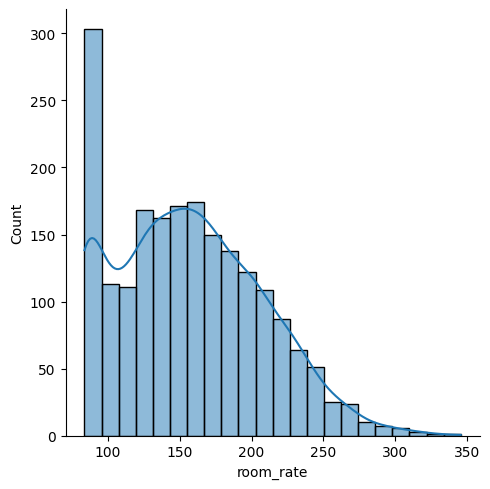

In [ ]:
sns.displot(df['room_rate'],kde='hist')

Digunakan untuk menampilkan pie chart dimana sesuai data yang ad dibawah dimana menunjukan berapa persen banyaknya type kamar yang di pesan dimana dari data tersebut menunjukan kalau type kamar yang paling di pesan yaitu kamar type basic dengan presentase sebesar 87,1%

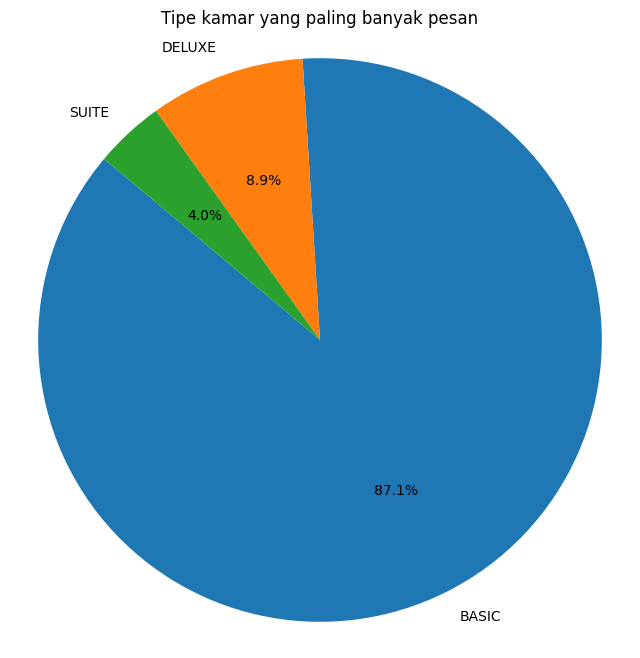

In [ ]:
counts = df['room_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tipe kamar yang paling banyak pesan')
plt.axis('equal')
plt.show()

Digunakan untuk menampilkan grafik batang sesuai data yang ada di bawah yang menunjukan bulan paling banyak tamu check in dan yang paing sedikit check in :)

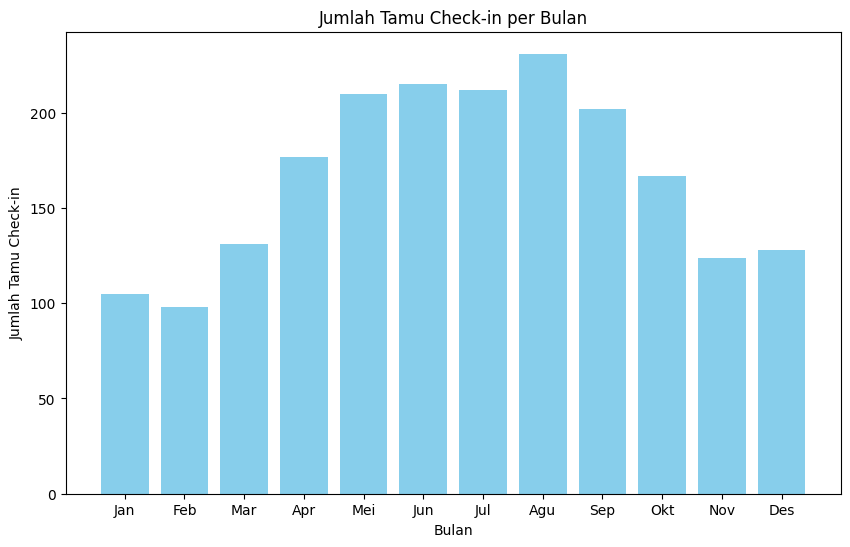

In [ ]:
df['checkin_date'] = pd.to_datetime(df['checkin_date'])
df['Month'] = df['checkin_date'].dt.month
check_in_counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(check_in_counts.index, check_in_counts.values, color='skyblue')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Tamu Check-in')
plt.title('Jumlah Tamu Check-in per Bulan')
plt.xticks(check_in_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

                    Unnamed: 0  amenities_fee  room_rate  credit_card_number
Unnamed: 0                1.00          -0.01       0.03                0.03
amenities_fee            -0.01           1.00      -0.02               -0.03
room_rate                 0.03          -0.02       1.00                0.02
credit_card_number        0.03          -0.03       0.02                1.00


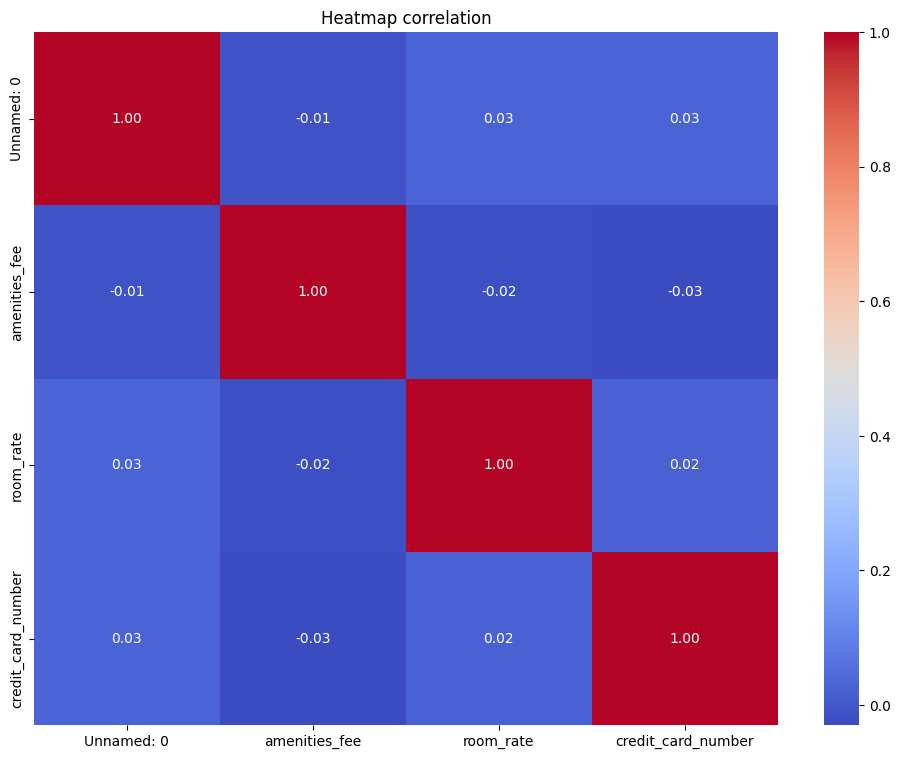

In [10]:
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr(method='pearson').round(2)
print(correlation_matrix.to_string())

fig, ax = plt.subplots(figsize=(12,9))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    square=False,
    fmt=".2f"
)

ax.set_title('Heatmap correlation')
plt.show()


<Axes: ylabel='room_rate'>

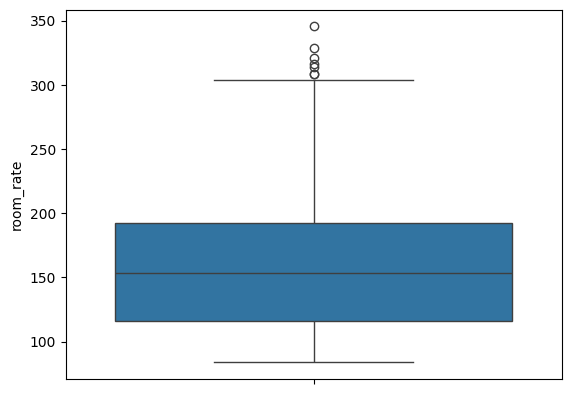

In [ ]:
sns.boxplot(df['room_rate'])

In [15]:
X = df.iloc[:,7]
X.head(5)

,room_rate
0,146.834507
1,185.497813
2,151.115528
3,182.468031
4,195.497743


In [16]:
y = df.iloc[:,4]
y.head(5)

,amenities_fee
0,8.324971
1,NaN
2,22.269158
3,25.468647
4,19.778311


Text(0, 0.5, 'amenities_fee')

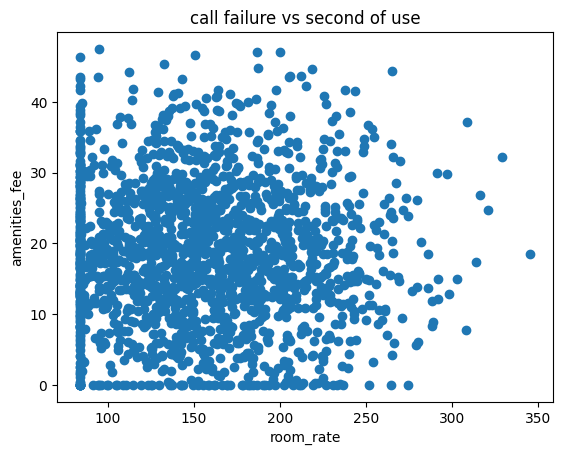

In [38]:
plt.scatter(X,y)
plt.title('call failure vs second of use')
plt.xlabel('room_rate')
plt.ylabel('amenities_fee')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
y_train = y_train.fillna(y_train.mean())


In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600,)
(400,)
(1600,)
(400,)


In [27]:
linear = LinearRegression()
linear.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [28]:
linear.coef_

array([-0.00046822])

In [29]:
linear.intercept_

18.627982021570546

In [30]:
Y_pred = linear.predict(np.array(X_test).reshape(-1,1))

In [31]:
Y_pred

array([18.58442279, 18.57820478, 18.52855186, 18.56448498, 18.58874508,
       18.57042542, 18.54125107, 18.57780261, 18.55562253, 18.5291893 ,
       18.54324111, 18.53660392, 18.54261356, 18.54333276, 18.5457725 ,
       18.57429176, 18.56297007, 18.56828743, 18.52158607, 18.55272084,
       18.56924525, 18.58865311, 18.58874508, 18.50574536, 18.56852242,
       18.58874508, 18.5615038 , 18.50204996, 18.56541242, 18.56769258,
       18.58315371, 18.54274623, 18.58874508, 18.55097971, 18.57753595,
       18.53151152, 18.56002561, 18.48608915, 18.55392165, 18.5260123 ,
       18.56771385, 18.54801032, 18.52799652, 18.53746044, 18.57216356,
       18.58731929, 18.54094669, 18.54308108, 18.58874508, 18.54198612,
       18.57186452, 18.58874508, 18.58874508, 18.56257694, 18.51996973,
       18.55291384, 18.54775219, 18.5752662 , 18.56361482, 18.55471609,
       18.58387309, 18.55468172, 18.57075311, 18.55819629, 18.57046163,
       18.50360729, 18.51944573, 18.56627558, 18.5553981 , 18.56

In [32]:
y_test

,amenities_fee
1860,6.688204
353,NaN
1333,43.714176
905,32.969909
1289,NaN
...,...
965,NaN
1284,15.589170
1739,21.878438
261,17.405127


In [36]:
print("NaN values in Y_pred:", pd.isnull(Y_pred).sum())
y_test_clean = y_test.dropna()
y_test_clean = y_test_clean.reset_index(drop=True)
Y_pred_clean = Y_pred[y_test_clean.index]
score = r2_score(y_test_clean, Y_pred_clean)
print("R-squared score:", score)

NaN values in Y_pred: 0
R-squared score: -0.0006903337423420641


Text(0, 0.5, 'amenities_fee')

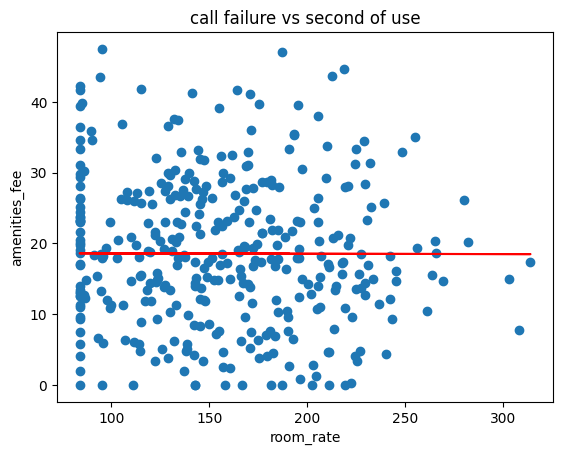

In [37]:
plt.scatter(X_test,y_test)
plt.plot(X_test,Y_pred,color='red')
plt.title('call failure vs second of use')
plt.xlabel('room_rate')
plt.ylabel('amenities_fee')